In [1]:
# You can download this dataset from kaggle.com
# https://www.kaggle.com/uciml/pima-indians-diabetes-database/data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
train_df = pd.read_csv("C:/Users/Dipti_B/Desktop/assignment_dataset/Diabetesdata.csv")
import seaborn as sns



In [2]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     766 non-null float64
BloodPressure               767 non-null float64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    767 non-null float64
Age                         767 non-null float64
Outcome                     768 non-null int64
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [4]:
# here i am interested to know that how much info i have.. coz the zeros are not providing me any info
# also as case is from medical so i dont want take risk by replacing such important value mean or medien or mode
 
(train_df == 0).astype(int).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [5]:
#so one way is to drop skinThickness & Insuline column 
# this is first version of this model so may be afterword we can replace these column value by some meaningful numbers
#train_df.drop(['SkinThickness'],axis=1, inplace=True)
#train_df.drop(['Insulin'],axis=1, inplace=True)
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1


In [6]:
#checking again
(train_df == 0).astype(int).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
cols = ["Glucose","BloodPressure","BMI"]
train_df[cols] = train_df[cols].replace(0,np.nan)
#checking again
(train_df == 0).astype(int).sum(axis=0)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     761 non-null float64
BloodPressure               732 non-null float64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         757 non-null float64
DiabetesPedigreeFunction    767 non-null float64
Age                         767 non-null float64
Outcome                     768 non-null int64
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [9]:
#train_df["Insulin"] =train_df["Insulin"].apply(lambda Insulin: " " if Insulin == 0 else Insulin)

In [10]:
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     761 non-null float64
BloodPressure               732 non-null float64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         757 non-null float64
DiabetesPedigreeFunction    767 non-null float64
Age                         767 non-null float64
Outcome                     768 non-null int64
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [12]:
train_df.shape

(768, 9)

In [13]:
train_df=train_df.dropna()
train_df.Glucose.dtype


dtype('float64')

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 721 non-null int64
Glucose                     721 non-null float64
BloodPressure               721 non-null float64
SkinThickness               721 non-null int64
Insulin                     721 non-null int64
BMI                         721 non-null float64
DiabetesPedigreeFunction    721 non-null float64
Age                         721 non-null float64
Outcome                     721 non-null int64
dtypes: float64(5), int64(4)
memory usage: 56.3 KB


In [16]:
train_df.corr()
train_df.to_csv('diabetes_cleaned_dataset.csv')

Text(0.5,1,'Correlation between different features')

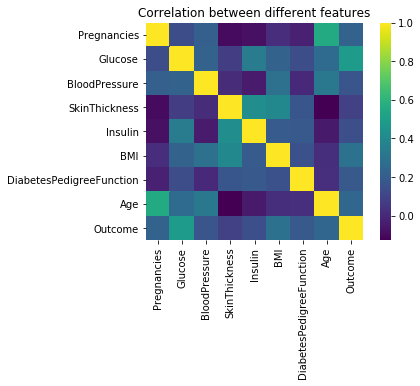

In [458]:
#check the correlation between the variables
correlation = train_df.corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

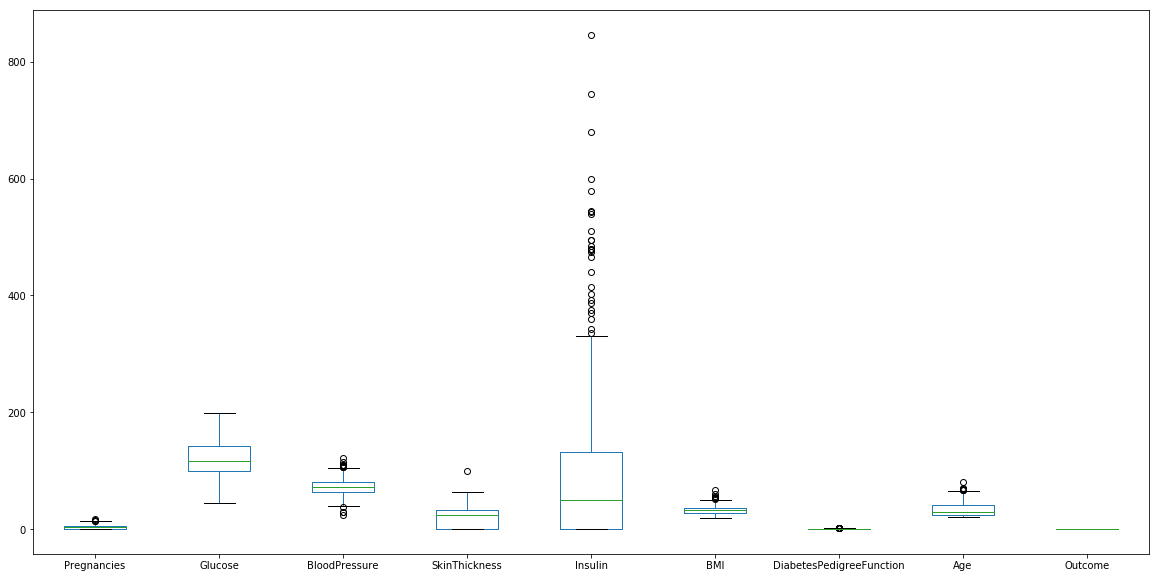

In [459]:
train_df.plot(kind='box',figsize=(20,10))

In [460]:
# store target variable in target variable and drop it from the spectf dataframe
Outcome=train_df['Outcome']
train_df.drop('Outcome',axis=1,inplace=True)
train_df_new=train_df

In [461]:
print(train_df_new.isnull().sum())
print(Outcome.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64
0


In [462]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_df_new,Outcome,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(504, 8)
(504,)
(217, 8)
(217,)


In [463]:
# Lets test this dataset with different models

In [464]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [465]:
# Create decision tree classifer object
clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train model
model = clf.fit(train_df_new, Outcome)

In [466]:
# Calculate feature importances
importances = model.feature_importances_

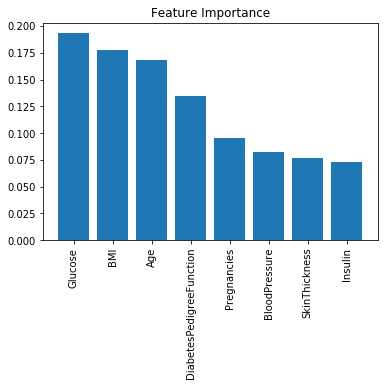

In [467]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [train_df_new.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(train_df_new.shape[1]), importances[indices])
#train_df_new_new=plt.bar(range(train_df_new.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(train_df_new.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [468]:
rfClassifier=RandomForestClassifier(max_depth = 5, min_samples_split=5, n_estimators = 15, random_state = 1,criterion='gini')

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rfClassifier.fit(train_df_new, Outcome)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [469]:
rfClassifier.score(train_df_new,Outcome)


0.8446601941747572

In [470]:
rfClassifier.score(x_train,y_train)

0.8253968253968254

In [471]:
# Now test the model

# First transform theinput for the test

test_pred = rfClassifier.predict(x_test)
test_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

[[134   6]
 [ 18  59]]


(0.8908449784510905, 0.8894009216589862, 0.8870003049672316, None)

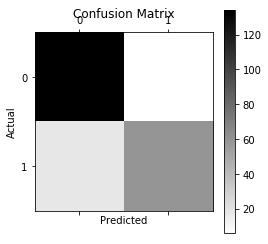

In [472]:

from sklearn import metrics
df_confusion = metrics.confusion_matrix(y_test, test_pred)
print(df_confusion)

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)
df_confusion = metrics.precision_recall_fscore_support(y_test, test_pred,average='weighted')
df_confusion

In [473]:
a=test_pred
b=y_test
result=pd.DataFrame(a,b)
result.columns=['Actual Output']


In [474]:
#now selecting important features 

In [475]:
# Create a list of the feature column's names
features=['Glucose' , 'BMI', 'Age', 'DiabetesPedigreeFunction' ]

# View features
features

['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']

In [476]:
rfClassifier.fit(train_df_new[features], Outcome)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [477]:
rfClassifier.score(train_df_new[features],Outcome)

0.8474341192787794

In [478]:
rfClassifier.score(x_train[features],y_train)

0.8313492063492064

In [479]:
# Now test the model

# First transform theinput for the test

test_pred = rfClassifier.predict(x_test[features])
test_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

Confusion Matrix
 [[134   6]
 [ 19  58]]


(0.8866158022348724, 0.8847926267281107, 0.882037443497829, None)

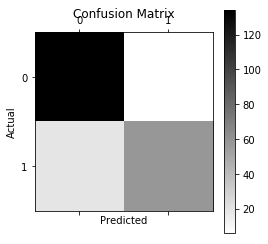

In [481]:

from sklearn import metrics
df_confusion = metrics.confusion_matrix(y_test, test_pred)
print("Confusion Matrix\n",df_confusion)
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plot_confusion_matrix(df_confusion)
df_confusion = metrics.precision_recall_fscore_support(y_test, test_pred,average='weighted')
df_confusion